In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: MacOSX


In [3]:
def load_clients(filename):

    with open(filename, 'rb') as fp:
        clients = pickle.load(fp)
    print("client size: ", len(clients))
    
    distribution = {}
    for client in clients:
        distribution[client] = distribution.get(client, 0) + 1

    distribution = sorted(distribution.items(), key=lambda x: -x[-1])
    x = np.array([i[0] for i in distribution])
    y = np.array([i[1] for i in distribution])
    print("distinct clients: ",len(x))
    print("var: ", np.var(y))
    return x, y

In [4]:
def savefig_word_distribution(x, y, topk=50):
    x_top = x[:topk]
    y_top = y[:topk]
    total_clients = np.sum(y)
    with plt.style.context("seaborn"):
        plt.xticks(rotation=90)
        
        plt.xlabel("words")
        plt.ylabel("word_counts")
        plt.title("Words Count Distribution")
        plt.plot(x_top, y_top, '^-')
        plt.savefig(f"./clients_{total_clients}.png", format="png")


In [5]:
x, y = load_clients("./zipf_remove_top5_1989.txt")
savefig_word_distribution(x, y, topk=50)



client size:  1989
distinct clients:  234
var/client:  12.585552268244577


: 

In [5]:
x, y = load_clients("./triehh_clients_remove_top5_90740.txt")
savefig_word_distribution(x, y, topk=50)

client size:  90740
distinct clients:  15737
var/client:  0.06305916690756608


## Generate Zipf Distribution dataset

In [8]:
import numpy as np
import pandas as pd

a = np.random.zipf(1.5, 2200)                                            


with open("./triehh_clients_remove_top5_90740.txt", 'rb') as f:
    data = pickle.load(f) 

k = np.bincount(a)[1:]

value_counts = pd.value_counts(data)

value_counts.sort_values(ascending=False)

clients = []
rank = 0
for item in value_counts.keys():
    clients += [item]*k[rank]
    rank += 1

np.random.shuffle(clients)
n = len(clients)

with open(f"./zipf_{n}.txt", 'wb') as f:
    pickle.dump(clients, f)


## Generate Poisson distribution dataset

In [ ]:
import numpy as np

import pandas as pd

a = np.random.poisson(100, 2000)                                            


with open("./triehh_clients_remove_top5_90740.txt", 'rb') as f:
    data = pickle.load(f) 

k = np.bincount(a)[1:]

value_counts = pd.value_counts(data)

value_counts.sort_values(ascending=False)

clients = []
rank = 0
for item in value_counts.keys():
    clients += [item]*k[rank]
    rank += 1

np.random.shuffle(clients)

with open("./zipf_remove_top5_20000.txt", 'wb') as f:
    pickle.dump(clients, f)


In [ ]:
mechanism = ['fedft', 'wtrie', 'triehh','pem']
color = ["blue","orange", "green",  "red"]
score = 'F1'
connectionloss = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
dir = ["../results/connectionloss_99411/", "../results/connectionloss_90740/"]
plt.figure()
for clsr in connectionloss:
    for inx, mc in enumerate(mechanism):
        filename = f"{mechanism}_cls{clsr}_F1"
        col = color[inx]
        

## Generate Numeric Dataset
> https://www.kaggle.com/datasets/ahmedsowah/fitbit-fitness-data (dailySteps_merged.csv)

In [13]:
import pandas as pd
import pickle
import os 
import time
import matplotlib.pyplot as plt

In [14]:
steps_df = pd.read_csv("./dailySteps_merged.csv")

In [5]:
steps_df.describe()

,Id,StepTotal
count,9.400000e+02,940.000000
mean,4.855407e+09,7637.910638
std,2.424805e+09,5087.150742
min,1.503960e+09,0.000000
25%,2.320127e+09,3789.750000
50%,4.445115e+09,7405.500000
75%,6.962181e+09,10727.000000
max,8.877689e+09,36019.000000


In [9]:
steps_df.head()

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


In [8]:
steps_df.ActivityDay.unique()

array(['4/12/2016', '4/13/2016', '4/14/2016', '4/15/2016', '4/16/2016',
       '4/17/2016', '4/18/2016', '4/19/2016', '4/20/2016', '4/21/2016',
       '4/22/2016', '4/23/2016', '4/24/2016', '4/25/2016', '4/26/2016',
       '4/27/2016', '4/28/2016', '4/29/2016', '4/30/2016', '5/1/2016',
       '5/2/2016', '5/3/2016', '5/4/2016', '5/5/2016', '5/6/2016',
       '5/7/2016', '5/8/2016', '5/9/2016', '5/10/2016', '5/11/2016',
       '5/12/2016'], dtype=object)

In [3]:
specific_date = '4/24/2016'
filter_df = (steps_df.loc[steps_df.ActivityDay == specific_date])

[3. 0. 3. 0. 4. 2. 2. 2. 2. 1. 1. 2. 1. 2. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 1.] [    0.           766.26666667  1532.53333333  2298.8
  3065.06666667  3831.33333333  4597.6         5363.86666667
  6130.13333333  6896.4         7662.66666667  8428.93333333
  9195.2         9961.46666667 10727.73333333 11494.
 12260.26666667 13026.53333333 13792.8        14559.06666667
 15325.33333333 16091.6        16857.86666667 17624.13333333
 18390.4        19156.66666667 19922.93333333 20689.2
 21455.46666667 22221.73333333 22988.        ]


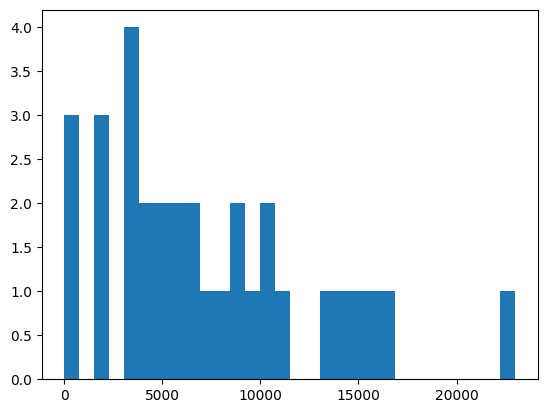

In [37]:
from random import randint


distribution_p = filter_df.StepTotal/filter_df.StepTotal.sum()

counts, bins, _ = plt.hist(filter_df.StepTotal, bins=30)
print(counts, bins)
counts_p = counts/counts.sum()


In [31]:
import numpy as np

In [32]:

def gen_samples(n, bins):
    synthetic_list = []
    for j in range(n):
        choice_list = [randint(int(bins[i]), int(bins[i+1])+1) for i in range(len(bins)-1)]
        synthetic_list.append(np.random.choice(choice_list, p=counts_p))
    return synthetic_list


(array([937., 940., 942., 603., 636., 151., 477., 155.,   0., 159.]),
 array([    0. ,  2298.8,  4597.6,  6896.4,  9195.2, 11494. , 13792.8,
        16091.6, 18390.4, 20689.2, 22988. ]),
 <BarContainer object of 10 artists>)

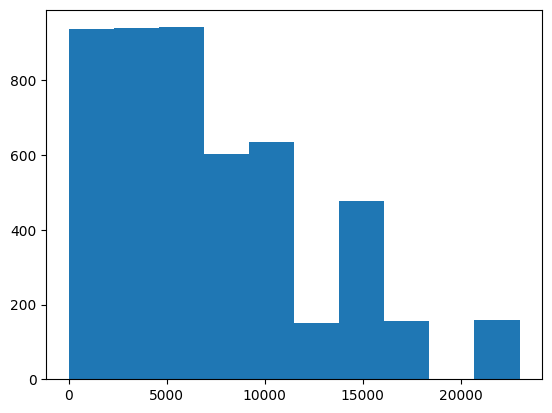

In [38]:
gen_SC = gen_samples(5000, bins)
plt.hist(gen_SC)

In [34]:
binary_data = [bin(i) for i in gen_SC]

In [88]:
binary_data[:10]

['0b10001000100100',
 '0b10000111101110',
 '0b1101010100101',
 '0b101011110100101',
 '0b101001010100',
 '0b1011001011101',
 '0b11110110',
 '0b110111110101',
 '0b100001000101001',
 '0b10100110000000']

In [89]:
gen_SC[:10]

[8740, 8686, 6821, 22437, 2644, 5725, 246, 3573, 16937, 10624]

In [39]:
with open("synthetic_steps.txt", 'wb') as f:
    pickle.dump(gen_SC, f)

In [85]:
type(gen_SC)

list

## Share Car Location

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import s2cell
import plotly.express as px

In [2]:
path = "./shareCarLoc.csv"
df_car = pd.read_csv(path)


In [4]:
df_car = df_car[df_car["total_cars"]>0]

In [8]:
df_car["s2cell"] = df_car.apply(lambda row: s2cell.lat_lon_to_cell_id(row["latitude"], row["longitude"]), axis = 1)

In [36]:
def Ts2cell(row):
    s2cell = (row["s2cell"] >> 11) << 11
    timestamp = pd.to_datetime(row["timestamp"])
    hour = timestamp.hour
    minute = timestamp.minute
    return s2cell + ((hour << 6) + minute)

df_car["Ts2cell"] = df_car.apply(Ts2cell, axis = 1)

In [63]:
df_car["hour"] = df_car.apply(lambda x: x["timestamp"].split(":")[0].split(" ")[-1], axis=1)
# str.split
# minute = df_car["timestamp"][1].minute
# df_car_st = df_car[df_car["timestamp"].hour == hour and df_car["timestamp"].minute == minute]

In [360]:
df_group_by_hour = df_car.groupby(["hour", "latitude", "longitude", "s2cell"])["total_cars"].sum()

In [2]:
df_group_by_hour = pd.read_csv("./groupByhourCarShar.csv")

In [53]:
hour = 10
df_car_h = df_group_by_hour[df_group_by_hour["hour"] == hour] 
top_3 = df_car_h.sort_values(by="total_cars", ascending=False).iloc[:3, :]

In [48]:
fig = px.density_mapbox(df_car_h, width=900, height=900, lat="latitude", lon="longitude", z="total_cars", mapbox_style="stamen-terrain", radius=40, zoom=12)

In [49]:

import plotly.graph_objects as go
fig.add_trace(go.Scattermapbox(
        lat=top_3["latitude"],
        lon=top_3["longitude"],
        mode='markers+text',
        marker=go.scattermapbox.Marker(
            size=8,
            color='black',
            opacity=0.5
        ),
        showlegend= False,
    ))

fig.add_trace(go.Scattermapbox(
        lat=top_3["latitude"],
        lon=top_3["longitude"],
        mode='markers+text',
        marker=go.scattermapbox.Marker(
            size=4,
            color='red'
            
        ),
        # hovertext = ["Hot Car Park"],
        # hoverinfo='text',
        name="Hot Car Park",
        # showlegend=False
    ))

fig.update_layout(
    legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.5
))



fig.write_html("map.html")

In [54]:

for i in range(3):
    print(f"(lat: {top_3['latitude'].values[i]}, lon: {top_3['longitude'].values[i]}, s2cell: {bin(top_3['s2cell'].values[i])[2:]})")

(lat: 32.111506, lon: 34.840876, s2cell: 1010100011101010010011110101010110000010101000011110000110011)
(lat: 32.0849, lon: 34.7966, s2cell: 1010100011101010010111011111111011101110001111001001100001001)
(lat: 32.1097, lon: 34.8408, s2cell: 1010100011101010010011110101100101001101110111011111011101001)


In [6]:
import plotly.io as pio
pio.write_image(fig, "h10shareCar.png")


ValueError: Transform failed with error code 525: Mapbox error.